In [85]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
# Load dataset from csv file

data = pd.read_csv("adult-all.csv")

In [11]:
# Understand dataset structure
print(data.shape)
print(data.dtypes)

(48842, 15)
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Salary            object
dtype: object


In [12]:
# Get unique values for each column
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].unique()

print("Unique Values for Each Column:")
for column, values in unique_values.items():
    print(f"{column}: {values}")

Unique Values for Each Column:
age: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt: [ 77516  83311 215646 ... 173449  89686 350977]
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op

In [97]:
# Based on the unique values from above, count number of rows with missing values
print((data['workclass'] == '?').sum())
print((data['native-country'] == '?').sum())
print((data['occupation'] == '?').sum())

2799
857
2809


In [54]:
# Replacing the "?" values with NULLS 
datanew = data.replace('?', None)

# Removing records with NULLS
datanew = datanew.dropna()
datanew.shape

# A total of 6.6% of the total number of rows is removed

(45222, 15)

In [20]:
# Feature Engineering

In [57]:
# Creating a column for age buckets or groups
# Define age group bins and labels
bins = [0, 30, 50, 70, float('inf')]
labels = ["Under 30", "31-50", "51-70", "Above 70"]

# Create the 'Age Group' column
datanew['agegroup'] = pd.cut(datanew['age'], bins=bins, labels=labels)

# Test the new column has been created correctly
print(datanew.groupby('agegroup')['age'].agg(['min', 'max']))

          min  max
agegroup          
Under 30   17   30
31-50      31   50
51-70      51   70
Above 70   71   90


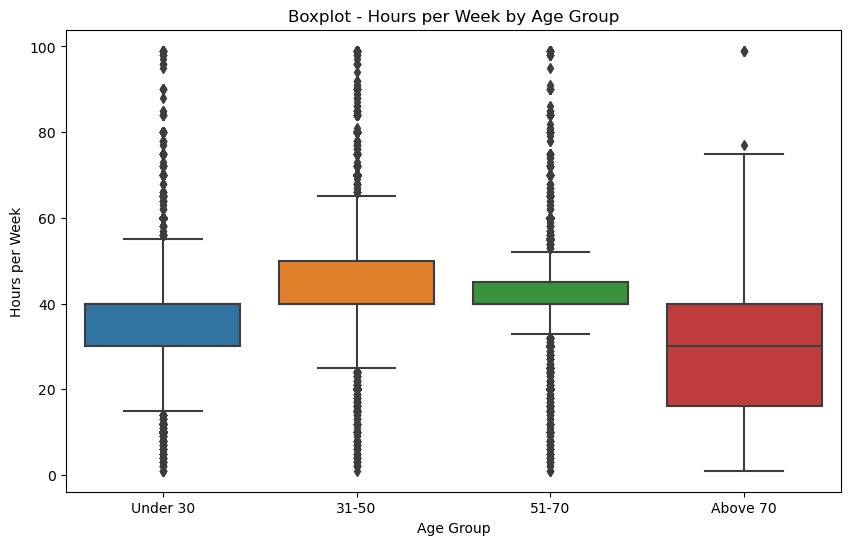

In [62]:
# Finding outliers in hours-per-week worked for every age group

# Create a boxplot to view outliers for each age group
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='agegroup', y='hours-per-week', data=datanew)

# Add title and labels
plt.title("Boxplot - Hours per Week by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Hours per Week")

# Show the plot
plt.show()

In [58]:
# Creating a new variable to classify education level

# Create a dictionary to map education categories to labels
education_mapping = {
    "Preschool": "School Dropout",
    "1st-4th": "School Dropout",
    "5th-6th": "School Dropout",
    "7th-8th": "School Dropout",
    "9th": "School Dropout",
    "10th": "School Dropout",
    "11th": "School Dropout",
    "12th": "School Dropout",
    "HS-grad": "High School Graduate",
    "Some college": "Community College",
    "Assoc-acdm": "Community College",
    "Assoc-voc": "Community College",
    "Bachelors": "Undergraduate",
    "Masters": "Graduate",
    "Prof_school": "Graduate",
    "Doctorate": "Post Graduate"
}


# Create a new column 'Education Category' based on the mapping
datanew['educationgroup'] = datanew['education'].map(education_mapping)

print(datanew.groupby(['education', 'educationgroup']).size())

education   educationgroup      
10th        School Dropout           1223
11th        School Dropout           1619
12th        School Dropout            577
1st-4th     School Dropout            222
5th-6th     School Dropout            449
7th-8th     School Dropout            823
9th         School Dropout            676
Assoc-acdm  Community College        1507
Assoc-voc   Community College        1959
Bachelors   Undergraduate            7570
Doctorate   Post Graduate             544
HS-grad     High School Graduate    14783
Masters     Graduate                 2514
Preschool   School Dropout             72
dtype: int64


In [60]:
# converting the salary variable to a numeric value

datanew['Salary'] = datanew['Salary'].replace({'>50K': 1, '<=50K': 0})

print(datanew['Salary'].unique())

[0 1]


In [63]:
# Find the total split between folks earning below and above 50k

print(datanew.groupby(['Salary']).size())

Salary
0    34014
1    11208
dtype: int64


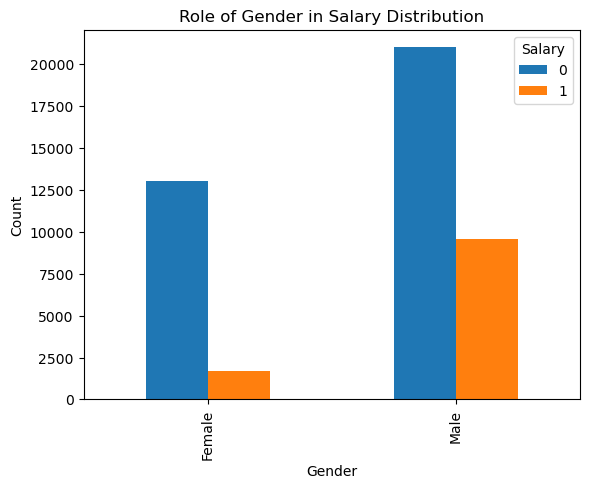

In [99]:
# Creating a column comparison chart with salary and sex variables

# Group the data and calculate the counts
grouped = datanew.groupby(['sex', 'Salary']).size().unstack(fill_value=0)

# Create a column chart
grouped.plot(kind='bar', stacked=False)

# Add title and labels
plt.title("Role of Gender in Salary Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

In [100]:
print(grouped)

Salary      0     1
sex                
Female  13026  1669
Male    20988  9539


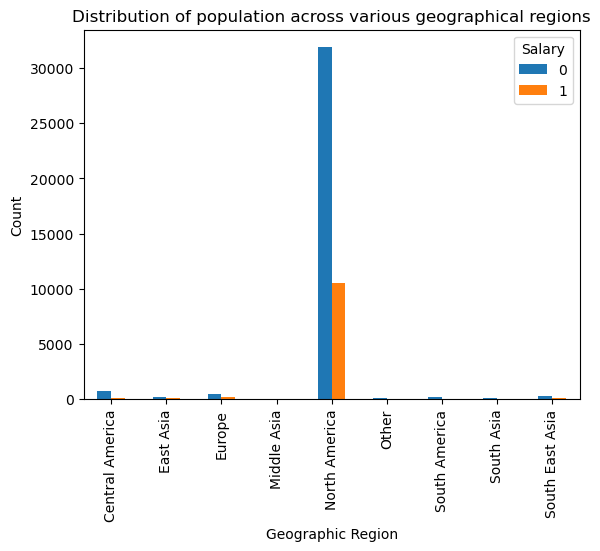

In [101]:
# Study the split across geographical regions 

# Group the data and calculate the counts
grouped = datanew.groupby(['georegion', 'Salary']).size().unstack(fill_value=0)

# Create a column chart
grouped.plot(kind='bar', stacked=False)

# Add title and labels
plt.title("Distribution of population across various geographical regions")
plt.xlabel("Geographic Region")
plt.ylabel("Count")

# Show the plot
plt.show()

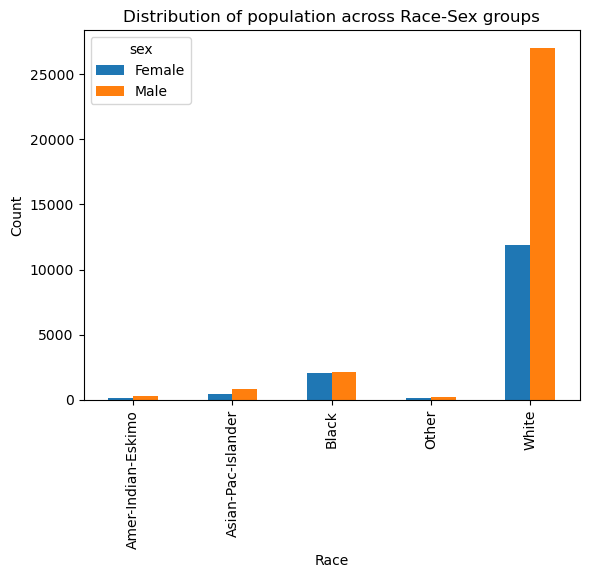

In [71]:
# Creating a column comparison chart with race and sex variables

# Group the data and calculate the counts
grouped = datanew.groupby(['race', 'sex']).size().unstack(fill_value=0)

# Create a column chart
grouped.plot(kind='bar', stacked=False)

# Add title and labels
plt.title("Distribution of population across Race-Sex groups")
plt.xlabel("Race")
plt.ylabel("Count")

# Show the plot
plt.show()

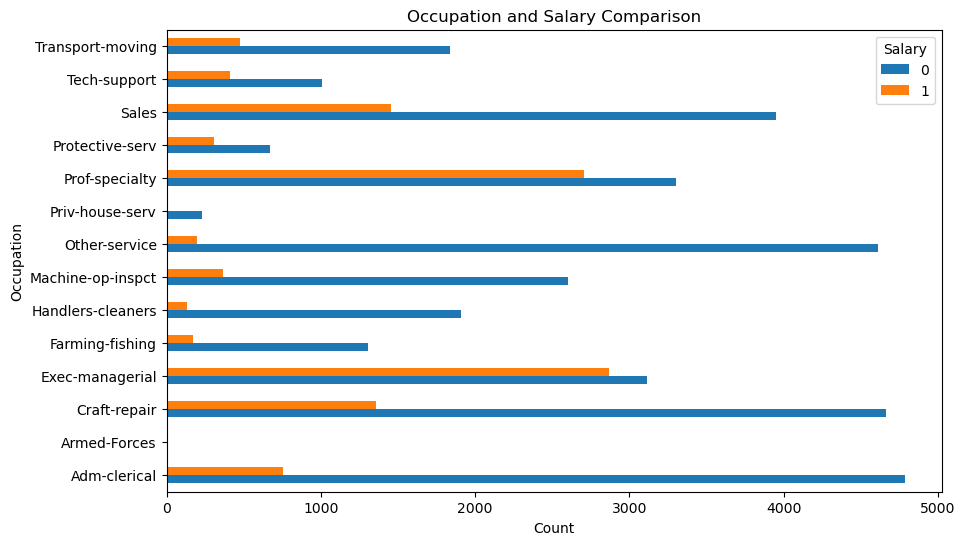

In [74]:
# Creating a column comparison chart with occupation and salary variables

# Group the data and calculate the counts
grouped = datanew.groupby(['occupation', 'Salary']).size().unstack(fill_value=0)

# Create a horizontal bar chart
grouped.plot(kind='barh', stacked=False, figsize=(10, 6))

# Add title and labels
plt.title("Occupation and Salary Comparison")
plt.xlabel("Count")
plt.ylabel("Occupation")

# Show the plot
plt.show()


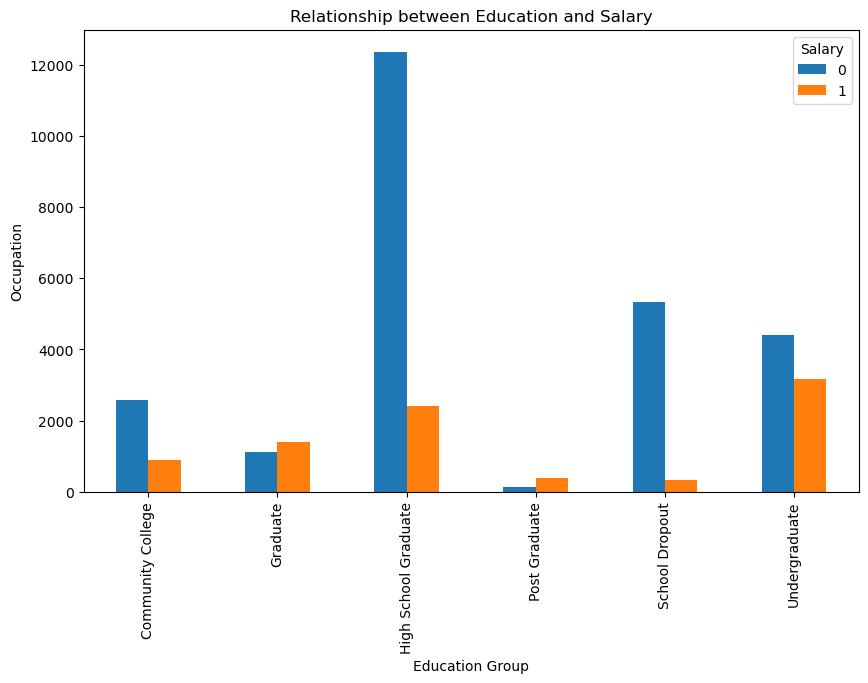

In [75]:
# Creating a column comparison chart with education and salary variables

# Group the data and calculate the counts
grouped = datanew.groupby(['educationgroup', 'Salary']).size().unstack(fill_value=0)

# Create a horizontal bar chart
grouped.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add title and labels
plt.title("Relationship between Education and Salary")
plt.xlabel("Education Group")
plt.ylabel("Occupation")

# Show the plot
plt.show()

In [82]:
# Use label encoding to convert all the columns to a numeric form

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

dataKNN = datanew.apply(LabelEncoder().fit_transform)
dataKNN.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary,georegion,agegroup,educationgroup
0,22,5,3217,9,12,4,0,1,4,1,26,0,39,38,0,4,0,5
1,33,4,3519,9,12,2,3,0,4,1,0,0,12,38,0,4,0,5
2,21,2,17196,11,8,0,5,1,4,1,0,0,39,38,0,4,0,2
3,36,2,18738,1,6,2,5,0,2,1,0,0,39,38,0,4,1,4
4,11,2,23828,9,12,2,9,5,2,0,0,0,39,4,0,0,3,5


In [83]:
# Remove variables that are repetitive or not necessary for the analysis

columns_to_remove = ['fnlwgt', 'education-num', 'relationship', 'capital-gain', 'capital-loss']

# Replace with the names of the columns you want to remove
dataKNN = dataKNN.drop(columns=columns_to_remove)

print(dataKNN.dtypes)

age               int64
workclass         int32
education         int32
marital-status    int32
occupation        int32
race              int32
sex               int32
hours-per-week    int64
native-country    int32
Salary            int64
georegion         int32
agegroup          int32
educationgroup    int32
dtype: object


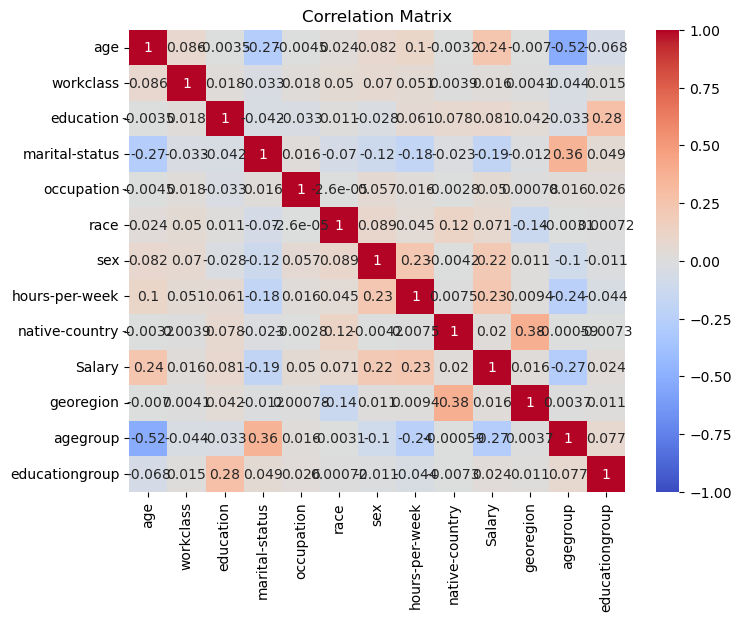

In [84]:
# Creating a correlation matrix 

corr_matrix = dataKNN.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title("Correlation Matrix")

# Show the plot
plt.show()

In [86]:
# Creating the test and train split

# Split the dataset into chosen features (X) and target (y)
X = dataKNN[['occupation', 'education', 'sex']]
y = dataKNN['Salary']

# Split the data using 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
# Define a list of K values to test
kvals = [9, 11, 33]

for k in kvals:
    # Create a KNN model with the current K value
    knnmodel = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knnmodel.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knnmodel.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'K = {k}, Accuracy = {accuracy}')

K = 9, Accuracy = 0.7764510779436152
K = 11, Accuracy = 0.7804311774461028
K = 33, Accuracy = 0.7896075179657269
